In [2]:
from datetime import datetime

In [2]:
%reload_ext autoreload

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from code.data import Data

In [4]:
data = Data("lastfm-dataset-1K\userid-timestamp-artid-artname-traid-traname.tsv")

Skipping line 2120260: expected 6 fields, saw 8

Skipping line 2446318: expected 6 fields, saw 8

Skipping line 11141081: expected 6 fields, saw 8

Skipping line 11152099: expected 6 fields, saw 12
Skipping line 11152402: expected 6 fields, saw 8

Skipping line 11882087: expected 6 fields, saw 8

Skipping line 12902539: expected 6 fields, saw 8
Skipping line 12935044: expected 6 fields, saw 8

Skipping line 17589539: expected 6 fields, saw 8



==== Model user_previous_tracks ====


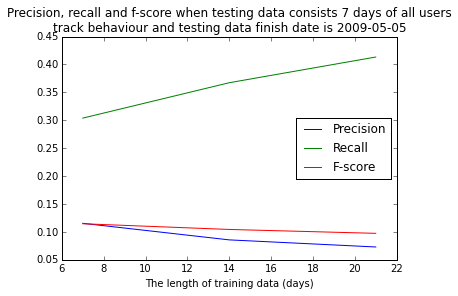

In [17]:
from code.experiments import Experiment
training_lengths = [21,14,7]#[28,21,14,7,4,3,2,1]
testing_lengths = [7]
testing_finish_dates = [datetime(2009, 5, 5)]#, datetime(2009, 4, 28), datetime(2009, 1, 1)]

experiment = Experiment(training_lengths, testing_lengths, testing_finish_dates)
experiment.run(data, 1, as_graph=True)

In [7]:
id_2 = data.create_experiment_data(21, 7, datetime(2009, 5, 5), 2)

In [19]:
from code.models import Model
model = Model('all_previous_tracks', data, id_2)
model.run()

==== all_previous_tracks ====
Model precision: 0.000376851069159
Model recall: 0.729049401278
F1 score: 0.000752194594366


(0.00037685106915876133, 0.7290494012776494, 0.0007521945943660343)

In [20]:
from code.models import Model
model = Model('all_previous_tracks', data, id_0)
model.run()

==== all_previous_tracks ====
Model precision: 0.000624075225112
Model recall: 0.579352212458
F1 score: 0.00124310423208


(0.0006240752251117361, 0.5793522124578825, 0.0012431042320759974)

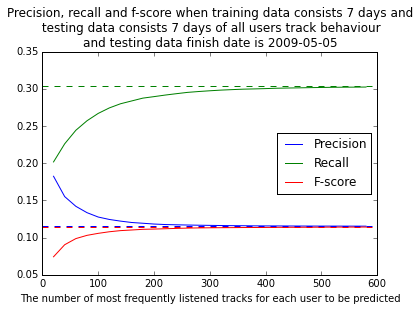

In [19]:
from code.experiments import *
n_values = [i for i in xrange(0, 600, 20)]
experiment = NMostOftenExperiment(7, 7, datetime(2009, 5, 5), data, 2, n_values)
experiment.run()

In [23]:
model = Model('n_most_often', data, id_0, 0)
model.run()

==== n_most_often ====
Model precision: 0.101351071923
Model recall: 0.305581152481
F1 score: 0.101958648557


(0.1013510719225647, 0.3055811524814172, 0.10195864855658361)

The modularity of the network is 0.999143


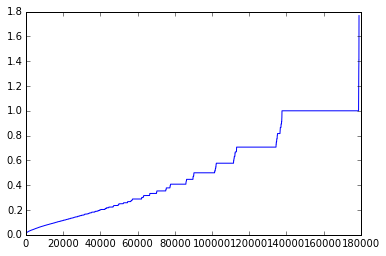

In [80]:
from code.clustering import TrackClustering
id_0 = data.create_experiment_data(14, 7, datetime(2009, 5, 5), 0, True)
training_data = data.get_training_data(id_0)
clustering = TrackClustering(training_data, 60, 0.5)
clustering.run(plot_similarities=True)

In [51]:
# Pick randomly from cluster
from code.models import Model
model = Model('from_clusters_randomly', data, id_0, cluster=clustering)
model.run()

==== from_clusters_randomly ====
Model precision: 0.0942905698813
Model recall: 0.274801121538
F1 score: 0.0932627215797


(0.09429056988130449, 0.274801121538349, 0.09326272157973355)

In [53]:
# Pick everything from the same clusters
from code.models import Model
model = Model('from_clusters_all', data, id_0, cluster=clustering)
model.run()

==== from_clusters_all ====
Model precision: 0.0413473209357
Model recall: 0.31757420223
F1 score: 0.0488867946537


(0.041347320935742796, 0.3175742022300341, 0.048886794653744986)

In [39]:
# Pick by user track frequency from cluster
from code.models import Model
model = Model('from_cluster_by_user_track_freq', data, id_0, cluster=clustering)
model.run()

==== from_cluster_by_user_track_freq ====
Model precision: 0.0877749857403
Model recall: 0.210553741136
F1 score: 0.0696446065685


(0.08777498574030573, 0.2105537411359492, 0.06964460656854184)

In [ ]:
# Above not allows clusters <= 1 in size
# (0.08994986329032331, 0.22576150831764272, 0.07746522314737116)
# Allowing all clusters
#(0.09044191861126076, 0.32640826614648893, 0.09965851997669273) 

In [87]:
from code.models import Model
model = Model('from_cluster_by_common_neighbors', data, id_0, cluster=clustering)
model.run()

==== from_cluster_by_common_neighbors ====
Model precision: 0.138019431161
Model recall: 0.147806061911
F1 score: 0.0508732976671


(0.13801943116122076, 0.1478060619113595, 0.050873297667137274)

In [93]:
from code.models import Model
model = Model('from_cluster_by_common_neighbors', data, id_0, cluster=clustering)
model.run()

==== from_cluster_by_common_neighbors ====
Model precision: 0.0893417627656
Model recall: 0.335512746944
F1 score: 0.101093743555


(0.08934176276562146, 0.33551274694396627, 0.1010937435549352)

In [ ]:
len(clustering.clusters[977])
# (0.1013510719225647, 0.3055811524814172, 0.10195864855658361)
# If n_most_often with n=0 (average)
# (0.11539153917941855, 0.3039238453494779, 0.11460842087132825)
# If only one from each cluster
#(0.1213822402327674, 0.2164157619293085, 0.07422903204197034)

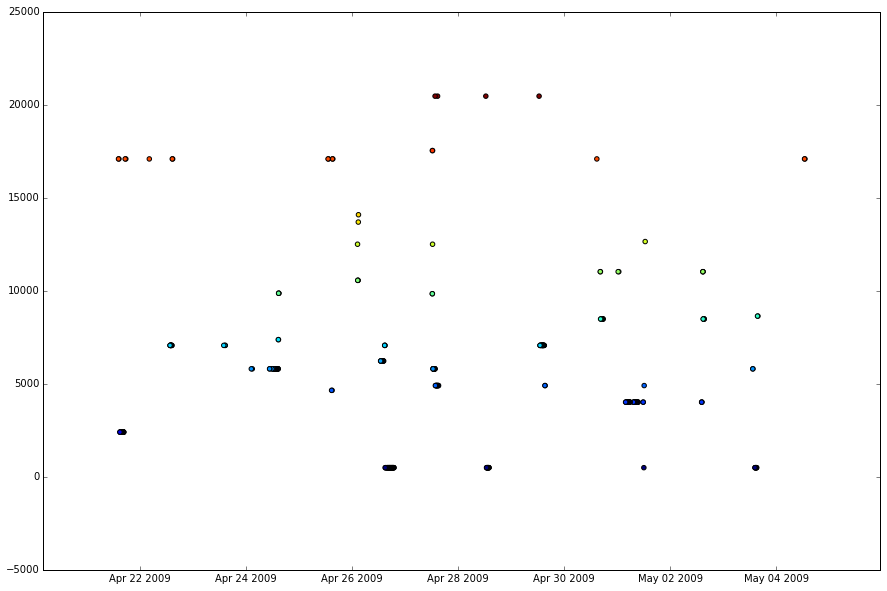

In [117]:
plt.figure(figsize=(15,10), dpi=1000)
axes = plt.gca()
#axes.set_xlim(['2009-05-04 13:06:09','2009-04-21 14:16:27'])
plt.scatter(times, cluster_ids, c=cluster_ids)

In [45]:
print len(CmtyV)
print len([x for x in CmtyV if len(x) > 1])

23237
9860


In [46]:
l = [len(a) for a in CmtyV]

In [47]:
l.sort()
l[-10:]

[245, 248, 280, 287, 291, 300, 304, 342, 344, 355]

In [48]:
s = [a for a in CmtyV if len(a) == 5]

In [49]:
for a in s[0]:
    print labels[a]

Shiola
Loathsome
Splinters Through A Straw
Catching Feathers
Death Salvation


In [21]:
id_2 = data.create_experiment_data(7, 7, datetime(2009, 5, 5), 2)

In [22]:
tr_d = data.get_training_data(id_2)

In [45]:
tr_d

,user_id,timestamp,track_id,track_name
219,user_000001,2009-04-27 15:12:38,996c807f-68df-4a23-aa2d-8ccd9b71b1da,The Lords Of Sanity
220,user_000001,2009-04-27 15:04:51,1c558d0d-34fd-44e1-9abd-28f86d454cf7,Up The Beach
221,user_000001,2009-04-27 14:57:54,d1de63b3-fb80-46bc-befa-8e55076b379a,The Crush
222,user_000001,2009-04-27 14:45:21,6f69766e-d6f9-4086-971e-1be5f9c0d660,Slightly
223,user_000001,2009-04-27 14:44:44,6bec4dc2-1900-4900-ace0-2a8428cff9ae,Btw
224,user_000001,2009-04-27 14:35:05,8f8e963f-2821-4eb6-b6ff-7dc361b3a536,To Last
225,user_000001,2009-04-27 14:28:46,0e432672-675c-42fe-b164-d7fd728c0cee,Deuce
226,user_000001,2009-04-27 14:21:14,ffb38aab-0144-4c9b-8fcf-8f6dff4362fd,Gridlock
227,user_000001,2009-04-27 14:14:03,342b9c70-57d3-4d44-bdb0-ae3f3e5af5e0,Sunlite
228,user_000001,2009-04-27 14:07:43,274f7902-9df9-419b-ab3d-e5844dbd7a42,Vacuum Stance
